In [45]:
import pandas as pd
import numpy as np


In [46]:
df=pd.read_csv(r"e:\Machine Learning\Dataset\rainfall_predict_train.csv")
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [47]:
df.drop(columns=["id"], inplace=True)

In [48]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=["rainfall"])
y=df["rainfall"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)  


In [50]:
import torch
import torch.nn as nn
import torch.optim as optim

In [51]:
class RainFallPredictor(nn.Module):
    def __init__(self,input_size):
        super(RainFallPredictor, self).__init__()

        self.model=nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [52]:
model=RainFallPredictor(x_train_scaled.shape[1])


In [53]:
from torch.utils.data import Dataset, DataLoader

class RainFallDataset(Dataset):
    def __init__(self,features,labels):
        self.features=features
        self.labels=labels

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        feature = torch.tensor(self.features[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return feature, label


In [54]:
y_train.values

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
dataset=RainFallDataset(x_train_scaled, y_train.values)

In [56]:
dataset[1]

(tensor([-1.2520e+00,  1.0633e-03, -7.1099e-01, -7.3484e-01, -6.6631e-01,
         -2.3138e-01,  1.1498e+00,  2.3525e-01, -1.0304e+00, -8.0429e-01,
         -9.4756e-01]),
 tensor(1.))

In [57]:
dataloader=DataLoader(dataset,shuffle=True,batch_size=32)

In [59]:
optimizer=optim.Adam(model.parameters(), lr=0.001)

loss_function=nn.BCELoss()

num_epochs = 50

for epoch in range(num_epochs):

    for features,labels in dataloader:
        
        predictions=model(features)

        loss=loss_function(predictions, labels.view(-1, 1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
        


Epoch 1/50, Loss: 0.3061
Epoch 2/50, Loss: 0.3453
Epoch 3/50, Loss: 0.3409
Epoch 4/50, Loss: 0.2873
Epoch 5/50, Loss: 0.3041
Epoch 6/50, Loss: 0.1478
Epoch 7/50, Loss: 0.2823
Epoch 8/50, Loss: 0.1894
Epoch 9/50, Loss: 0.3648
Epoch 10/50, Loss: 0.3921
Epoch 11/50, Loss: 0.2725
Epoch 12/50, Loss: 0.1888
Epoch 13/50, Loss: 0.3538
Epoch 14/50, Loss: 0.3089
Epoch 15/50, Loss: 0.1408
Epoch 16/50, Loss: 0.2173
Epoch 17/50, Loss: 0.2147
Epoch 18/50, Loss: 0.3491
Epoch 19/50, Loss: 0.3273
Epoch 20/50, Loss: 0.6222
Epoch 21/50, Loss: 0.3434
Epoch 22/50, Loss: 0.3331
Epoch 23/50, Loss: 0.0970
Epoch 24/50, Loss: 0.3121
Epoch 25/50, Loss: 0.1734
Epoch 26/50, Loss: 0.1352
Epoch 27/50, Loss: 0.2300
Epoch 28/50, Loss: 0.1398
Epoch 29/50, Loss: 0.2840
Epoch 30/50, Loss: 0.6551
Epoch 31/50, Loss: 0.3016
Epoch 32/50, Loss: 0.2447
Epoch 33/50, Loss: 0.3397
Epoch 34/50, Loss: 0.4609
Epoch 35/50, Loss: 0.4851
Epoch 36/50, Loss: 0.3474
Epoch 37/50, Loss: 0.1688
Epoch 38/50, Loss: 0.1859
Epoch 39/50, Loss: 0.

In [60]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.BCELoss()
num_epochs = 50

for epoch in range(num_epochs):
    epoch_loss = 0.0  # sum of losses
    num_batches = 0

    for features, labels in dataloader:
        predictions = model(features)
        loss = loss_function(predictions, labels.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")


Epoch 1/50, Average Loss: 0.2676
Epoch 2/50, Average Loss: 0.2657
Epoch 3/50, Average Loss: 0.2650
Epoch 4/50, Average Loss: 0.2630
Epoch 5/50, Average Loss: 0.2636
Epoch 6/50, Average Loss: 0.2650
Epoch 7/50, Average Loss: 0.2622
Epoch 8/50, Average Loss: 0.2622
Epoch 9/50, Average Loss: 0.2627
Epoch 10/50, Average Loss: 0.2592
Epoch 11/50, Average Loss: 0.2606
Epoch 12/50, Average Loss: 0.2601
Epoch 13/50, Average Loss: 0.2574
Epoch 14/50, Average Loss: 0.2567
Epoch 15/50, Average Loss: 0.2565
Epoch 16/50, Average Loss: 0.2571
Epoch 17/50, Average Loss: 0.2570
Epoch 18/50, Average Loss: 0.2527
Epoch 19/50, Average Loss: 0.2521
Epoch 20/50, Average Loss: 0.2520
Epoch 21/50, Average Loss: 0.2520
Epoch 22/50, Average Loss: 0.2507
Epoch 23/50, Average Loss: 0.2499
Epoch 24/50, Average Loss: 0.2525
Epoch 25/50, Average Loss: 0.2510
Epoch 26/50, Average Loss: 0.2470
Epoch 27/50, Average Loss: 0.2509
Epoch 28/50, Average Loss: 0.2454
Epoch 29/50, Average Loss: 0.2449
Epoch 30/50, Average Lo

Epoch 1/50, Average Loss: 0.2258
Epoch 2/50, Average Loss: 0.2297
Epoch 3/50, Average Loss: 0.2253
Epoch 4/50, Average Loss: 0.2266
Epoch 5/50, Average Loss: 0.2261
Epoch 6/50, Average Loss: 0.2253
Epoch 7/50, Average Loss: 0.2235
Epoch 8/50, Average Loss: 0.2216
Epoch 9/50, Average Loss: 0.2236
Epoch 10/50, Average Loss: 0.2220
Epoch 11/50, Average Loss: 0.2218
Epoch 12/50, Average Loss: 0.2205
Epoch 13/50, Average Loss: 0.2199
Epoch 14/50, Average Loss: 0.2221
Epoch 15/50, Average Loss: 0.2178
Epoch 16/50, Average Loss: 0.2177
Epoch 17/50, Average Loss: 0.2165
Epoch 18/50, Average Loss: 0.2160
Epoch 19/50, Average Loss: 0.2165
Epoch 20/50, Average Loss: 0.2112
Epoch 21/50, Average Loss: 0.2137
Epoch 22/50, Average Loss: 0.2185
Epoch 23/50, Average Loss: 0.2138
Epoch 24/50, Average Loss: 0.2097
Epoch 25/50, Average Loss: 0.2091
Epoch 26/50, Average Loss: 0.2057
Epoch 27/50, Average Loss: 0.2101
Epoch 28/50, Average Loss: 0.2111
Epoch 29/50, Average Loss: 0.2059
Epoch 30/50, Average Lo

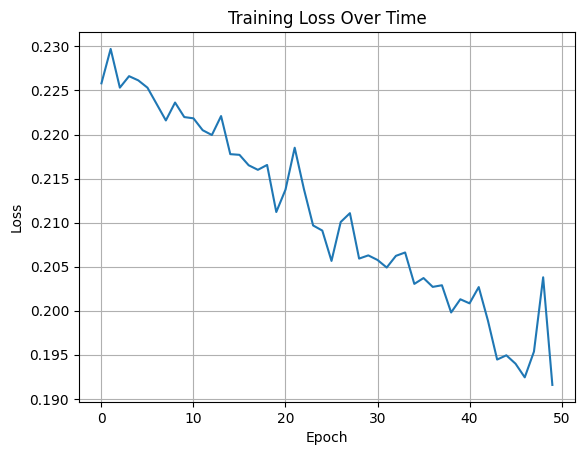

In [61]:
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for features, labels in dataloader:
        predictions = model(features)
        loss = loss_function(predictions, labels.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(dataloader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

# Plotting
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.grid(True)
plt.show()
